In [1]:
import pandas as pd
import numpy as np

In [2]:

# Load the dataset (replace 'data/dataset.csv' with the actual file path)
df = pd.read_csv('random_medical_data.csv')

# Filter the dataset to only include females (assuming 'sex' column is 0 for male and 1 for female)
df_females = df[df['sex'] == 1]

# Select the relevant columns: age, marital status, income, and endometriosis diagnosis
relevant_columns = ['age', 'sex', 'marital', 'income', 'endometriosis']
df_females_relevant = df_females[relevant_columns]

# Check the shape and data types of the filtered dataset
df_females_relevant_shape = df_females_relevant.shape
df_females_relevant_types = df_females_relevant.dtypes

# Check for missing values
df_females_relevant_missing = df_females_relevant.isnull().sum()

# Display summary of numerical columns
df_females_relevant_summary = df_females_relevant.describe()

df_females_relevant_shape, df_females_relevant_types, df_females_relevant_missing, df_females_relevant_summary



((100920, 5),
 age                int64
 sex                int64
 marital            int64
 income           float64
 endometriosis      int64
 dtype: object,
 age              0
 sex              0
 marital          0
 income           0
 endometriosis    0
 dtype: int64,
                  age       sex        marital         income  endometriosis
 count  100920.000000  100920.0  100920.000000  100920.000000  100920.000000
 mean       58.477467       1.0       0.300951  139519.576528       0.299604
 std        23.389173       0.0       0.458674   63450.541002       0.458087
 min        18.000000       1.0       0.000000   30004.030000       0.000000
 25%        38.000000       1.0       0.000000   84578.047500       0.000000
 50%        58.000000       1.0       0.000000  139152.915000       0.000000
 75%        79.000000       1.0       1.000000  194467.797500       1.000000
 max        99.000000       1.0       1.000000  249999.410000       1.000000)

In [20]:
# Plotting the distribution of Age

print(df_females_relevant['age'].describe())


count    100920.000000
mean         58.477467
std          23.389173
min          18.000000
25%          38.000000
50%          58.000000
75%          79.000000
max          99.000000
Name: age, dtype: float64


In [5]:
# Distribution of Age for females (numerical summary)
age_distribution = df_females_relevant['age'].describe()

# Count and percentage of unique values in Age column
age_counts = df_females_relevant['age'].value_counts().sort_index()

age_distribution, age_counts


(count    100920.000000
 mean         58.477467
 std          23.389173
 min          18.000000
 25%          38.000000
 50%          58.000000
 75%          79.000000
 max          99.000000
 Name: age, dtype: float64,
 age
 18     593
 19    1196
 20    1305
 21    1294
 22    1199
       ... 
 95    1213
 96    1238
 97    1252
 98    1266
 99     604
 Name: count, Length: 82, dtype: int64)

In [6]:
# Distribution of Endometriosis Diagnosis (0 = Not Diagnosed, 1 = Diagnosed)
endometriosis_counts = df_females_relevant['endometriosis'].value_counts()
endometriosis_percentage = df_females_relevant['endometriosis'].value_counts(normalize=True) * 100

endometriosis_counts, endometriosis_percentage


(endometriosis
 0    70684
 1    30236
 Name: count, dtype: int64,
 endometriosis
 0    70.039635
 1    29.960365
 Name: proportion, dtype: float64)

In [7]:
# Distribution of Marital Status
marital_counts = df_females_relevant['marital'].value_counts()
marital_percentage = df_females_relevant['marital'].value_counts(normalize=True) * 100

marital_counts, marital_percentage


(marital
 0    70548
 1    30372
 Name: count, dtype: int64,
 marital
 0    69.904875
 1    30.095125
 Name: proportion, dtype: float64)

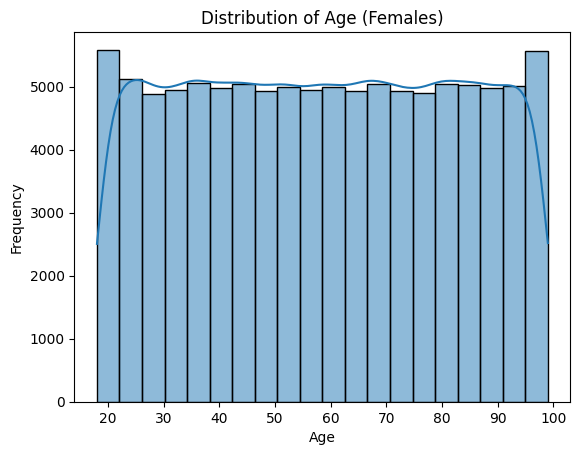

Age Distribution Summary:
count    100920.000000
mean         58.477467
std          23.389173
min          18.000000
25%          38.000000
50%          58.000000
75%          79.000000
max          99.000000
Name: age, dtype: float64

Age Counts (Number of occurrences by age):
age
18     593
19    1196
20    1305
21    1294
22    1199
      ... 
95    1213
96    1238
97    1252
98    1266
99     604
Name: count, Length: 82, dtype: int64

Age Percentages:
age
18    0.587594
19    1.185097
20    1.293103
21    1.282204
22    1.188070
        ...   
95    1.201942
96    1.226714
97    1.240587
98    1.254459
99    0.598494
Name: proportion, Length: 82, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of Age
sns.histplot(df_females_relevant['age'], kde=True, bins=20)
plt.title('Distribution of Age (Females)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Display the Age Distribution summary:
print("Age Distribution Summary:")
print(age_distribution)
print("\nAge Counts (Number of occurrences by age):")
print(age_counts)
print("\nAge Percentages:")
print(age_percentage)


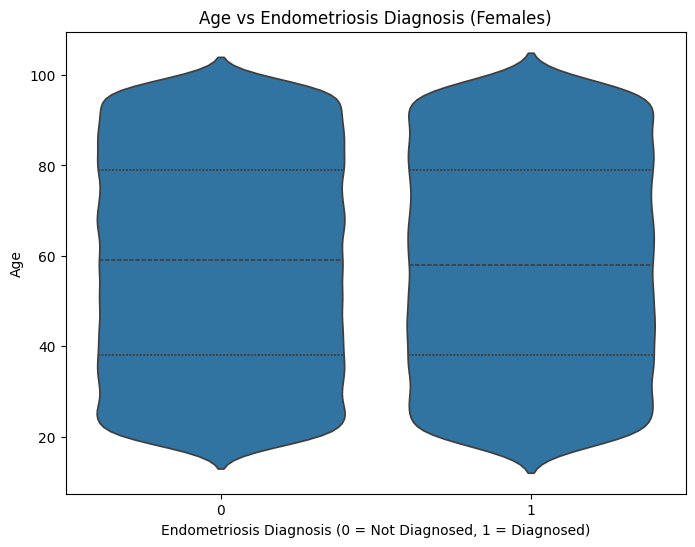

In [13]:
# Violin plot to compare Age with Endometriosis Diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_females_relevant, x='endometriosis', y='age', inner="quart")
plt.title('Age vs Endometriosis Diagnosis (Females)')
plt.xlabel('Endometriosis Diagnosis (0 = Not Diagnosed, 1 = Diagnosed)')
plt.ylabel('Age')
plt.show()


C:\Users\Gautam\AppData\Local\Temp\ipykernel_27472\2420343909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_females_relevant['age_group'] = pd.cut(df_females_relevant['age'], bins=bins, labels=labels, right=False)


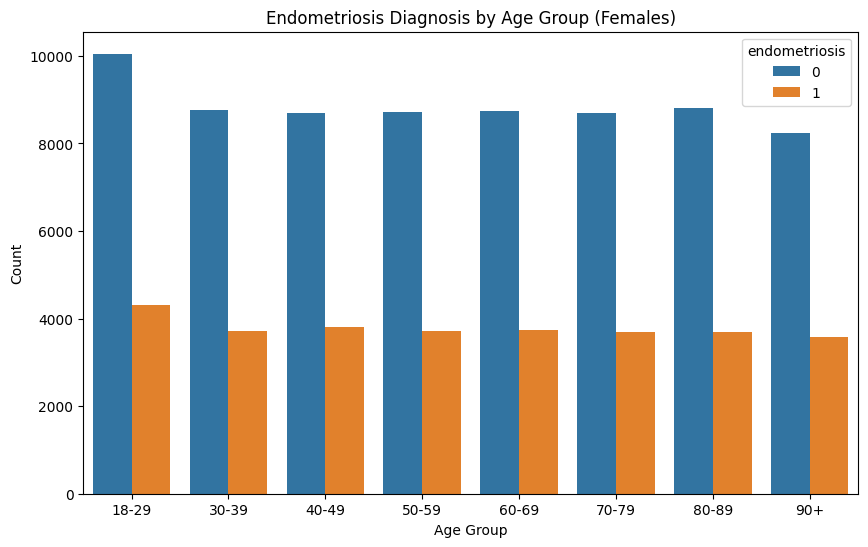

In [14]:
# Create age bins
bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
df_females_relevant['age_group'] = pd.cut(df_females_relevant['age'], bins=bins, labels=labels, right=False)

# Count plot to visualize the number of diagnosed vs non-diagnosed by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df_females_relevant, x='age_group', hue='endometriosis')
plt.title('Endometriosis Diagnosis by Age Group (Females)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


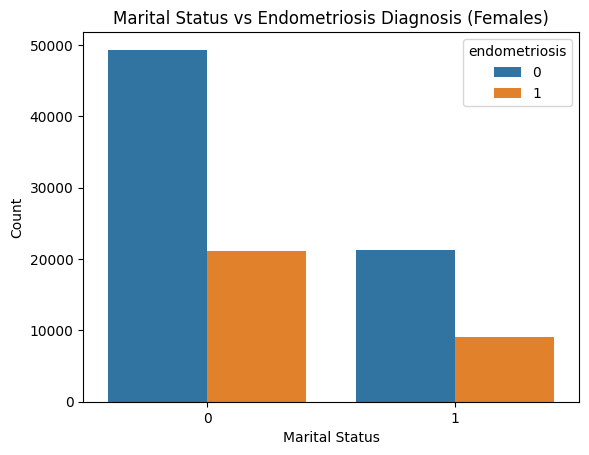

In [23]:
# Countplot to explore Marital Status vs Endometriosis Diagnosis
sns.countplot(data=df_females_relevant, x='marital', hue='endometriosis')
plt.title('Marital Status vs Endometriosis Diagnosis (Females)')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


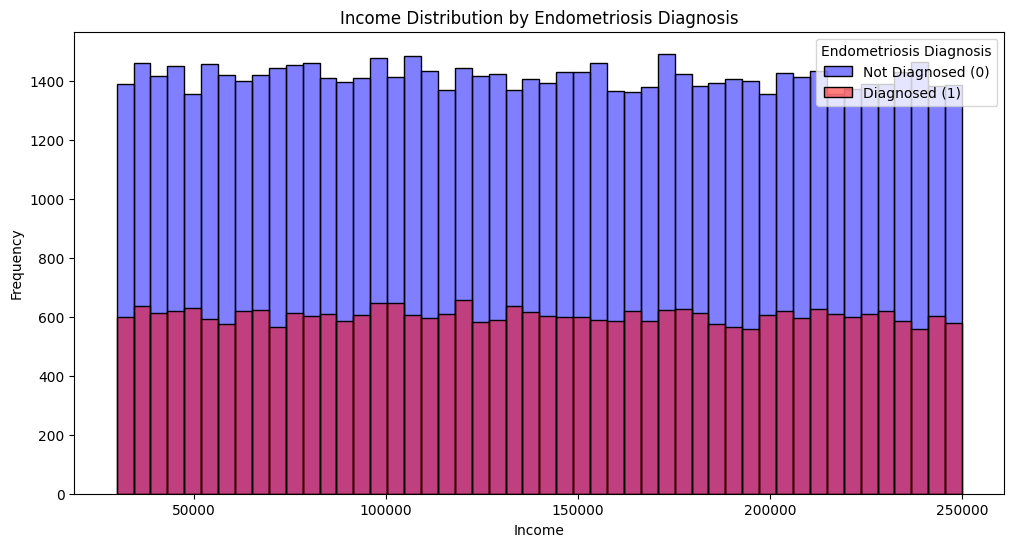

In [17]:
# Set up the plot size
plt.figure(figsize=(12, 6))

# Create the histograms for Income vs Endometriosis Diagnosis
sns.histplot(data=df_females_relevant[df_females_relevant['endometriosis'] == 0], 
             x='income', kde=False, color='blue', label='Not Diagnosed (0)', alpha=0.5, bins=50)
sns.histplot(data=df_females_relevant[df_females_relevant['endometriosis'] == 1], 
             x='income', kde=False, color='red', label='Diagnosed (1)', alpha=0.5, bins=50)

# Title and labels
plt.title('Income Distribution by Endometriosis Diagnosis')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend(title="Endometriosis Diagnosis")

# Show the plot
plt.show()
